In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn import metrics
from imblearn.over_sampling import SMOTE

# Klasifikatori
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from xgboost import XGBClassifier

In [114]:
df_final = pd.read_csv('credit_risk_df_final.csv')

In [115]:
df_final.head()

,Target,Predictor_6,Predictor_9,Predictor_7,Predictor_19,Predictor_32,Predictor_26,Predictor_76,Predictor_37,Predictor_24,...,Predictor_36,Predictor_5,Predictor_75,Predictor_39,Predictor_67,Predictor_79,Predictor_78,Predictor_40,Predictor_41,Predictor_13
0,0,0.0,0.00,0.0,0.5,6.965,6.965,4.0,0.0,51.71500,...,0.0,0.00,5.0,33.0,0.0,1.0,2.0,0.5,0.0,0.0
1,0,0.0,0.00,0.0,0.0,0.000,0.000,4.0,26230.0,28.76155,...,0.0,0.00,3.0,52.0,0.5,2.0,2.0,0.5,0.5,0.0
2,0,1.0,2070.63,2000.0,0.5,0.000,0.000,5.0,11889.0,133.14425,...,0.0,2070.63,35.0,36.0,0.5,1.0,1.5,4.5,2.0,0.0
3,1,1.0,567.79,1100.0,4.0,22.820,22.820,1.0,2361.0,358.31830,...,0.0,567.79,1.0,30.0,0.5,3.0,3.5,1.0,0.5,0.0
4,0,1.0,596.60,1005.0,1.0,49.730,49.730,2.0,0.0,0.00000,...,0.0,0.00,1.0,22.0,0.5,1.0,1.5,2.5,1.5,0.0


In [116]:
df_class = df_final['Target']
df_var = df_final.drop(columns = ['Target'])

In [117]:
train_data_var, test_data_var, train_class, test_class = train_test_split(df_var, df_class, stratify=df_class, test_size=0.3, random_state=24)

In [118]:
smote = SMOTE(random_state=42, sampling_strategy=0.6, k_neighbors=2)
train_data_var, train_class = smote.fit_resample(train_data_var, train_class)

In [119]:
grouped_by_class_test = test_class.value_counts()
grouped_by_class_test

Target
0    17908
1     3089
Name: count, dtype: int64

In [120]:
train_data_var = StandardScaler().fit_transform(train_data_var)
test_data_var = StandardScaler().fit_transform(test_data_var)

### Satistisko un individuālo uzraudzītas MM algoritmu apmācība

Loģistiskā regrsija

In [121]:
model_LR = LogisticRegression(random_state=42)
model_LR.fit(train_data_var, train_class)
test_class_LR = model_LR.predict(test_data_var)

In [122]:
cm_LR = confusion_matrix(test_class, test_class_LR, normalize='true')
acc_LR = accuracy_score(test_class, test_class_LR)
rec_LR = recall_score(test_class, test_class_LR)
prec_LR = precision_score(test_class, test_class_LR)
f1_LR = f1_score(test_class, test_class_LR)

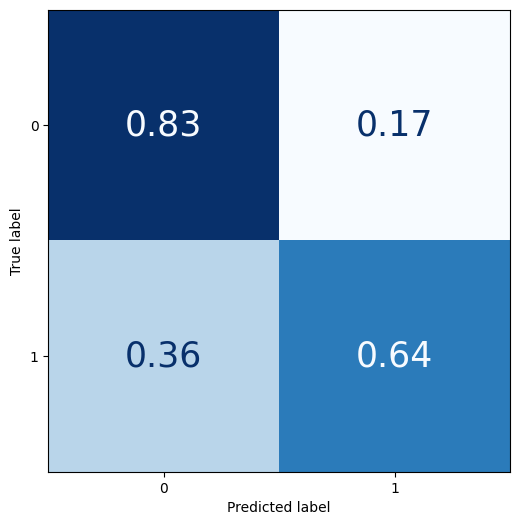

Pareizība:  0.7986379006524742
Atsaukums:  0.6370993849142117
Pricizitāte:  0.38778325123152707
F1:  0.4821166095051445


In [123]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_LR, display_labels=['0', '1'])
fig, ax = plt.subplots(figsize=(8, 6)) 
disp.plot(cmap=plt.cm.Blues, ax=ax, colorbar=False)
for text in disp.text_.ravel():  
    text.set_fontsize(25)
plt.show()

print('Pareizība: ', acc_LR)
print('Atsaukums: ', rec_LR)
print('Pricizitāte: ', prec_LR)
print('F1: ', f1_LR)

Lēmumu koks

In [76]:
model_DT = DecisionTreeClassifier(random_state=42, criterion='gini', max_depth=2)
model_DT.fit(train_data_var, train_class)
test_class_DT = model_DT.predict(test_data_var)

In [77]:
acc_DT = accuracy_score(test_class, test_class_DT)
prec_DT = precision_score(test_class, test_class_DT)
rec_DT = recall_score(test_class, test_class_DT)
f1_DT = f1_score(test_class, test_class_DT)
cm_DT = confusion_matrix(test_class, test_class_DT, normalize='true')

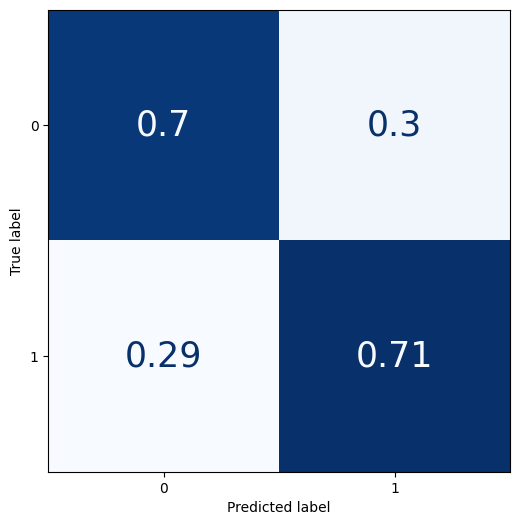

Pareizība:  0.7015764156784302
Atsaukums:  0.7141469731304629
Pricizitāte:  0.290683884569772
F1:  0.4131859898857464


In [78]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_DT, display_labels=['0', '1'])
fig, ax = plt.subplots(figsize=(8, 6)) 
disp.plot(cmap=plt.cm.Blues, ax=ax, colorbar=False)
for text in disp.text_.ravel():  
    text.set_fontsize(25)
plt.show()

print('Pareizība: ', acc_DT)
print('Atsaukums: ', rec_DT)
print('Pricizitāte: ', prec_DT)
print('F1: ', f1_DT)

Gadījumu mežs

In [124]:
model_RF = RandomForestClassifier(random_state=42, n_estimators=150, max_depth=2, criterion='gini')#,  
model_RF.fit(train_data_var, train_class)
test_class_RF = model_RF.predict(test_data_var)

In [125]:
cm_RF = confusion_matrix(test_class, test_class_RF, normalize='true')
acc_RF = accuracy_score(test_class, test_class_RF)
rec_RF = recall_score(test_class, test_class_RF)
prec_RF = precision_score(test_class, test_class_RF)
f1_RF = f1_score(test_class, test_class_RF)

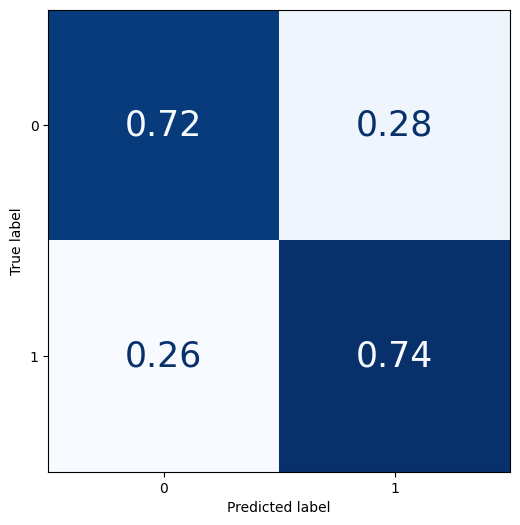

Pareizība:  0.7197694908796495
Atsaukums:  0.7374554872126902
Pricizitāte:  0.3098898109100803
F1:  0.4363984674329502


In [126]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_RF, display_labels=['0', '1'])
fig, ax = plt.subplots(figsize=(8, 6)) 
disp.plot(cmap=plt.cm.Blues, ax=ax, colorbar=False)
for text in disp.text_.ravel():  
    text.set_fontsize(25)
plt.show()

print('Pareizība: ', acc_RF)
print('Atsaukums: ', rec_RF)
print('Pricizitāte: ', prec_RF)
print('F1: ', f1_RF)

Atbalsta vektora mašīna

In [127]:
model_SVM = svm.SVC(kernel='rbf', random_state=42)#, probability=True
model_SVM.fit(train_data_var, train_class)
test_class_SVM = model_SVM.predict(test_data_var)

In [128]:
cm_SVM = confusion_matrix(test_class, test_class_SVM, normalize='true')
acc_SVM = accuracy_score(test_class, test_class_SVM)
prec_SVM = precision_score(test_class, test_class_SVM)
rec_SVM = recall_score(test_class, test_class_SVM)
f1_SVM = f1_score(test_class, test_class_SVM)

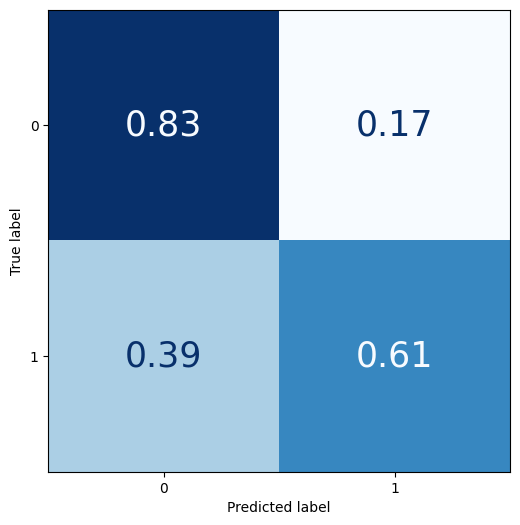

Pareizība:  0.7986379006524742
Atsaukums:  0.6105535772094529
Pricizitāte:  0.38403583791488494
F1:  0.4715


In [129]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_SVM, display_labels=['0', '1'], )
fig, ax = plt.subplots(figsize=(8, 6)) 
disp.plot(cmap=plt.cm.Blues, ax=ax, colorbar=False)
for text in disp.text_.ravel():  
    text.set_fontsize(25)
plt.show()

print('Pareizība: ', acc_SVM)
print('Atsaukums: ', rec_SVM)
print('Pricizitāte: ', prec_SVM)
print('F1: ', f1_SVM)

Gradienta palielināšanas

In [130]:
model_GB = GradientBoostingClassifier(learning_rate=0.01, max_depth=2, subsample=0.5, random_state=42)#, n_iter_no_change=10
model_GB.fit(train_data_var, train_class)
test_class_GB = model_GB.predict(test_data_var)

In [132]:
cm_GB = confusion_matrix(test_class, test_class_GB, normalize='true')
acc_GB = accuracy_score(test_class, test_class_GB)
rec_GB = recall_score(test_class, test_class_GB)
prec_GB = precision_score(test_class, test_class_GB)
f1_GB = f1_score(test_class, test_class_GB)

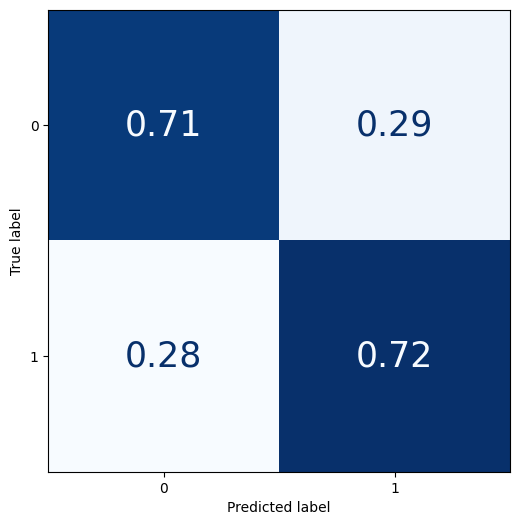

Pareizība:  0.7088631709291804
Atsaukums:  0.7238588539980576
Pricizitāte:  0.29829242262540023
F1:  0.42248464808691544


In [133]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_GB, display_labels=['0', '1'], )
fig, ax = plt.subplots(figsize=(8, 6)) 
disp.plot(cmap=plt.cm.Blues, ax=ax, colorbar=False)
for text in disp.text_.ravel():  
    text.set_fontsize(25)
plt.show()

print('Pareizība: ', acc_GB)
print('Atsaukums: ', rec_GB)
print('Pricizitāte: ', prec_GB)
print('F1: ', f1_GB)

Ekstrēma gradieta palielināšanas

In [ ]:
model_XGB = XGBClassifier(learning_rate=0.01, max_depth=2, subsample=0.6, colsample_bytree=0.7, random_state=42)
model_XGB.fit(train_data_var, train_class)
test_class_XGB = model_XGB.predict(test_data_var)

In [135]:
cm_XGB = confusion_matrix(test_class, test_class_XGB, normalize='true')
acc_XGB = accuracy_score(test_class, test_class_XGB)
rec_XGB = recall_score(test_class, test_class_XGB)
prec_XGB = precision_score(test_class, test_class_XGB)
f1_XGB = f1_score(test_class, test_class_XGB)

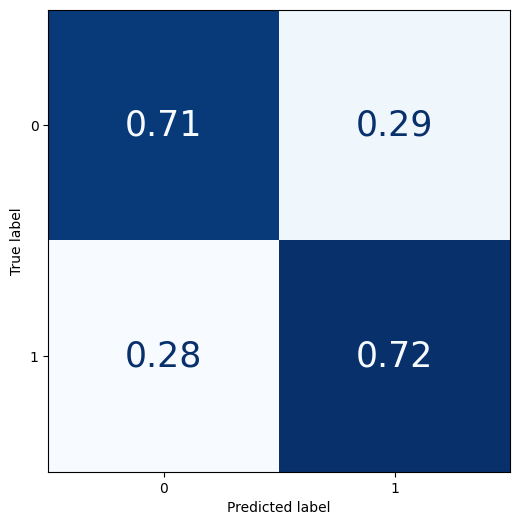

Pareizība:  0.707624898795066
Atsaukums:  0.7212690191000324
Pricizitāte:  0.29682920330402346
F1:  0.42057574327512975


In [136]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_XGB, display_labels=['0', '1'], )
fig, ax = plt.subplots(figsize=(8, 6)) 
disp.plot(cmap=plt.cm.Blues, ax=ax, colorbar=False)
for text in disp.text_.ravel():  
    text.set_fontsize(25)
plt.show()

print('Pareizība: ', acc_XGB)
print('Atsaukums: ', rec_XGB)
print('Pricizitāte: ', prec_XGB)
print('F1: ', f1_XGB)

Sagrupēto algoritmu modeli

1. metode - VotingClassifier

In [185]:
estimators = []
estimators.append(('LR', LogisticRegression(random_state=42)))
# estimators.append(('DT', DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth=3)))
estimators.append(('RF', RandomForestClassifier(max_depth=3, min_samples_split=5, criterion='entropy', random_state=42))) 
estimators.append(('SVM', svm.SVC(random_state=42,kernel='rbf')))#, 
# estimators.append(('GB', GradientBoostingClassifier(learning_rate=0.05, subsample=0.8, max_depth=4, random_state=42, n_iter_no_change=10)))
estimators.append(('XGB', XGBClassifier(learning_rate=0.01, max_depth=4, subsample=0.6, colsample_bytree=0.9,random_state=42)))

In [24]:
# LR, DT, RF, SVM

In [186]:
from sklearn.ensemble import VotingClassifier
model_Voting = VotingClassifier(estimators=estimators, voting='hard', verbose=1) #, , weights=[0.5, 0.8, 0.7, 0.9]
model_Voting.fit(train_data_var, train_class)
test_class_Voting = model_Voting.predict(test_data_var)

[Voting] ....................... (1 of 4) Processing LR, total=   0.4s
[Voting] ....................... (2 of 4) Processing RF, total=   8.6s
[Voting] ...................... (3 of 4) Processing SVM, total= 5.3min
[Voting] ...................... (4 of 4) Processing XGB, total=   1.0s


In [187]:
acc_Voting = accuracy_score(test_class, test_class_Voting)
prec_Voting= precision_score(test_class, test_class_Voting)
rec_Voting = recall_score(test_class, test_class_Voting)
f1_Voting = f1_score(test_class, test_class_Voting)
cm_Voting = confusion_matrix(test_class, test_class_Voting, normalize='true')

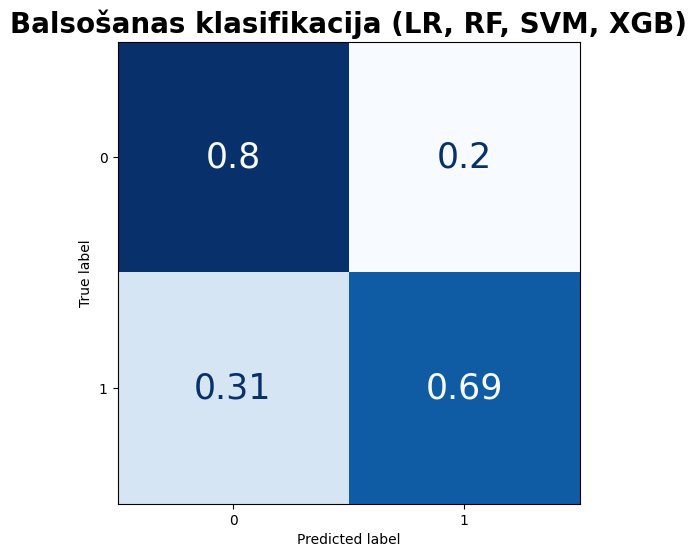

Pareizība:  0.7805877030051912
Atsaukums:  0.6947232113952736
Pricizitāte:  0.3693631669535284
F1:  0.4823013821777728


In [395]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_Voting, display_labels=['0', '1'], )
fig, ax = plt.subplots(figsize=(8, 6)) 
disp.plot(cmap=plt.cm.Blues, ax=ax, colorbar=False)
for text in disp.text_.ravel():  
    text.set_fontsize(25)
plt.title('Balsošanas klasifikacija (LR, RF, SVM, XGB)', fontsize=20, fontweight='bold')
plt.show()

print('Pareizība: ', acc_Voting)
print('Atsaukums: ', rec_Voting)
print('Pricizitāte: ', prec_Voting)
print('F1: ', f1_Voting)

2. metode - StackedClassifier

In [191]:
from sklearn.ensemble import StackingClassifier

In [391]:
# Defining base models and meta-model
base_learners = []
base_learners.append(('LR', LogisticRegression(random_state=42)))
# base_learners.append(('DT', DecisionTreeClassifier(random_state=1, criterion='entropy', ccp_alpha=0.1)))
base_learners.append(('RF', RandomForestClassifier(max_depth=3, min_samples_split=5, criterion='gini', random_state=42) )) 
### # base_learners.append(('SVM', svm.SVC(kernel='rbf', random_state=1, probability=True))) #,
# base_learners.append(('GB', GradientBoostingClassifier(learning_rate=0.01, subsample=0.8, max_depth=4, random_state=42, n_iter_no_change=10))) #, 
# base_learners.append(('XGB', XGBClassifier(learning_rate=0.01, max_depth=2, subsample=0.5, colsample_bytree=0.9, random_state=42)))#reg_alpha=0.5, gamma=1, eval_metric='logloss'))) # 
meta_model = XGBClassifier(learning_rate=0.01, max_depth=3, subsample=0.7, colsample_bytree=0.7, random_state=42)
#RandomForestClassifier(max_depth=3, min_samples_split=5, criterion='entropy', random_state=42)  

In [392]:
stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_model, stack_method='predict_proba', n_jobs=-1)#final_estimator=meta_model, 
stacking_model.fit(train_data_var, train_class)
test_class_Stacked = stacking_model.predict(test_data_var)

In [393]:
acc_stacked = accuracy_score(test_class, test_class_Stacked)
prec_stacked = precision_score(test_class, test_class_Stacked)
rec_stacked = recall_score(test_class, test_class_Stacked)
f1_stacked = f1_score(test_class, test_class_Stacked)
cm_stacked = confusion_matrix(test_class, test_class_Stacked, normalize='true')

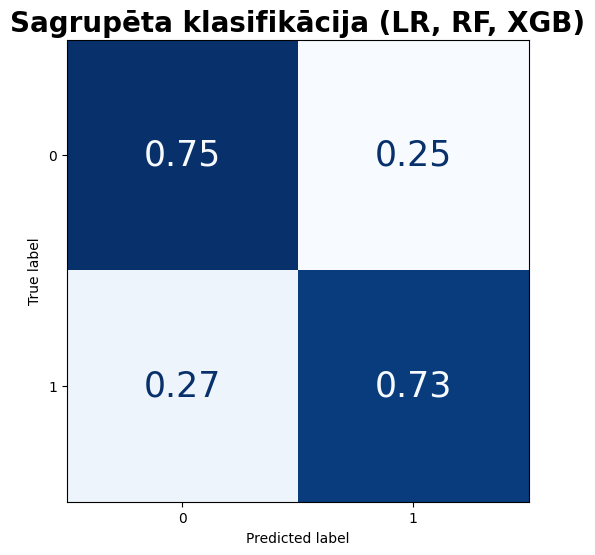

Pareizība:  0.7498214030575796
Atsaukums:  0.7287147944318549
Pricizitāte:  0.33768376837683767
F1:  0.46150691952844697


In [396]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_stacked, display_labels=['0', '1'], )
fig, ax = plt.subplots(figsize=(8, 6)) 
disp.plot(cmap=plt.cm.Blues, ax=ax, colorbar=False)
for text in disp.text_.ravel():  
    text.set_fontsize(25)
plt.title('Sagrupēta klasifikācija (LR, RF, XGB)', fontsize=20, fontweight='bold')
plt.show()
 
print('Pareizība: ', acc_stacked)
print('Atsaukums: ', rec_stacked)
print('Pricizitāte: ', prec_stacked)
print('F1: ', f1_stacked)

Visas pārpratuma matricas

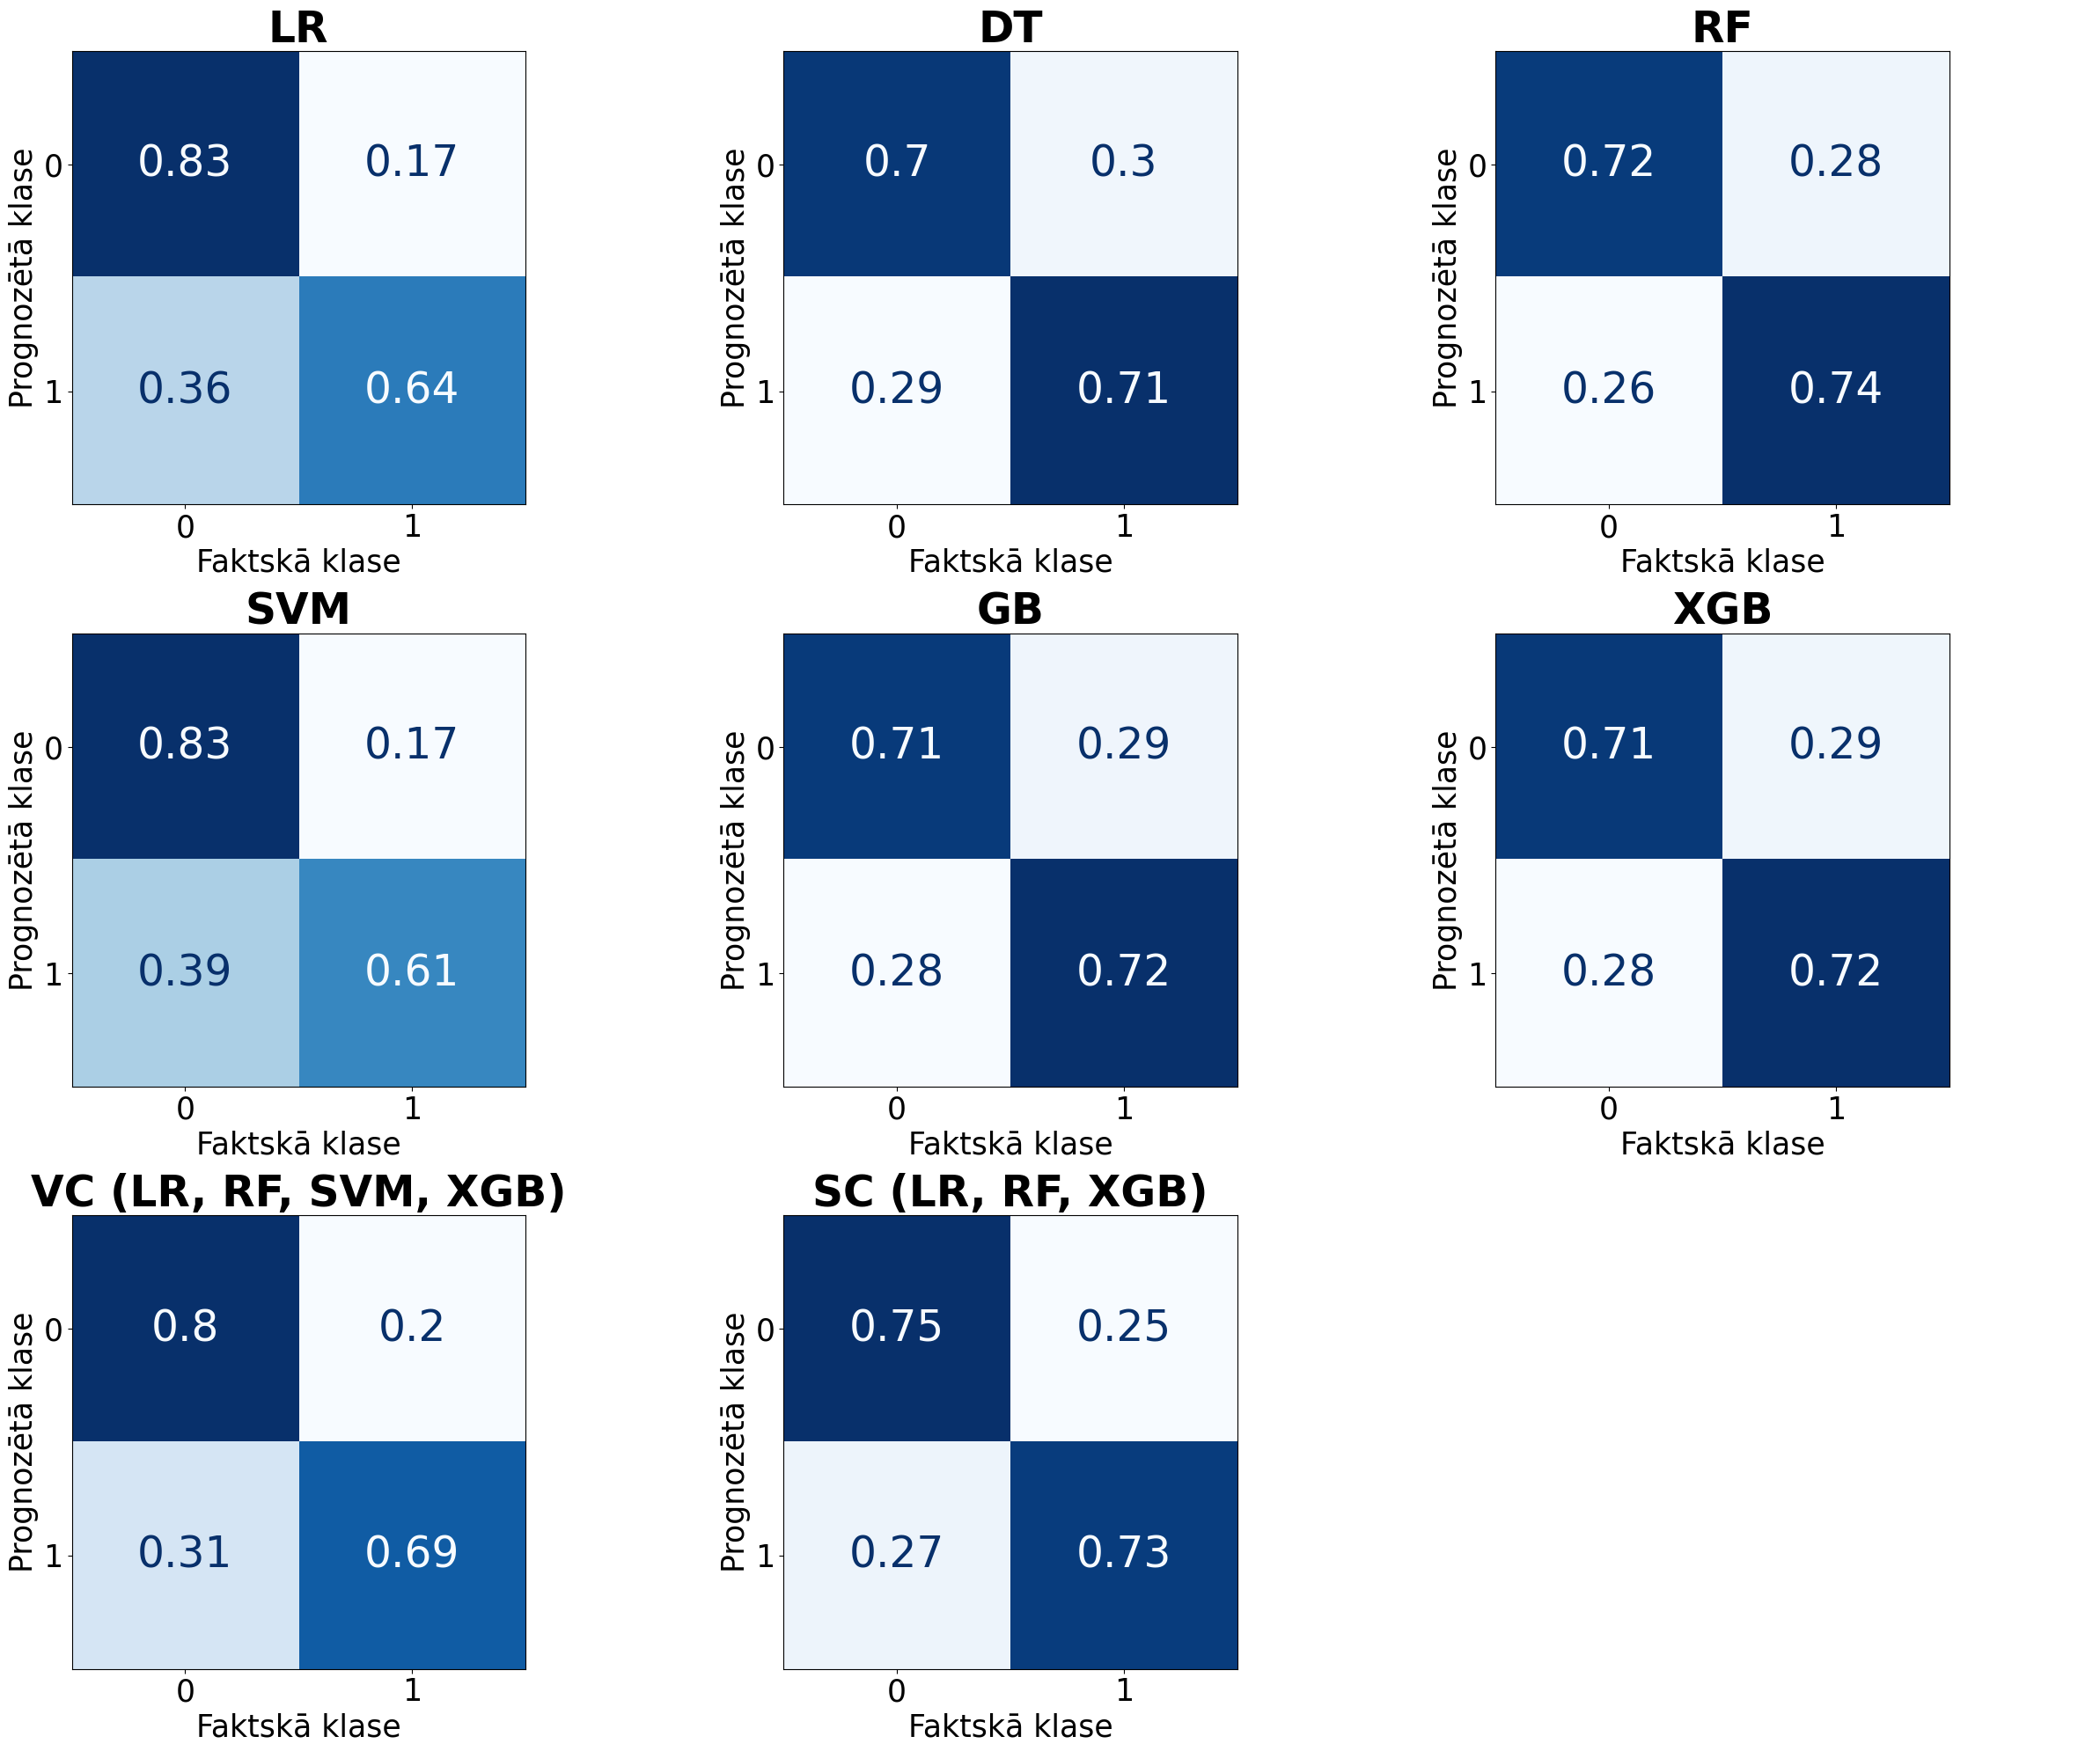

In [404]:
# models = ['Loģistiskā regresija', 'Lēmumu koks', 'Gadījumu mežs', 'Atbalsta vektora mašīna', 'Gradienta palielināšana', 'Ekstrēma gradienta palielināšana']
models = ['LR', 'DT', 'RF', 'SVM', 'GB', 'XGB', 'VC (LR, RF, SVM, XGB)', 'SC (LR, RF, XGB)']
predictions = [test_class_LR, test_class_DT, test_class_RF, test_class_SVM, test_class_GB, test_class_XGB, test_class_Voting, test_class_Stacked]  
true_labels = test_class 

fig, axes = plt.subplots(3, 3, figsize=(25, 20))  
axes = axes.ravel() 

for i, ax in enumerate(axes[:8]):  # Only iterate over the first 8 axes
    cm = confusion_matrix(true_labels, predictions[i], normalize='true')
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
    disp.plot(ax=ax, cmap=plt.cm.Blues, colorbar=False)
    ax.tick_params(axis='both', labelsize=25)
    for text in disp.text_.ravel():  
        text.set_fontsize(35)
    ax.set_title(models[i], fontsize=35, fontweight='bold')
    ax.set_xlabel('Faktskā klase', fontsize=25)
    ax.set_ylabel('Prognozētā klase', fontsize=25)

# Hide the last unused subplot
axes[8].axis('off')

plt.tight_layout()
plt.show()

Visās ROC liknes

In [406]:
def calc_roc(y_true, y_pred):
    fpr, tpr, th = metrics.roc_curve(y_true=y_true, y_score=y_pred)
    auc = metrics.roc_auc_score(y_true=y_true, y_score=y_pred)
    return fpr, tpr, th, auc

def plot_roc(y_true, y_pred, name, ax=None):
    fpr, tpr, th, auc = calc_roc(y_true=y_true, y_pred=y_pred)
    plt.plot(fpr, tpr, label='%s ROC (AUC = %0.3f)' % (name, auc))

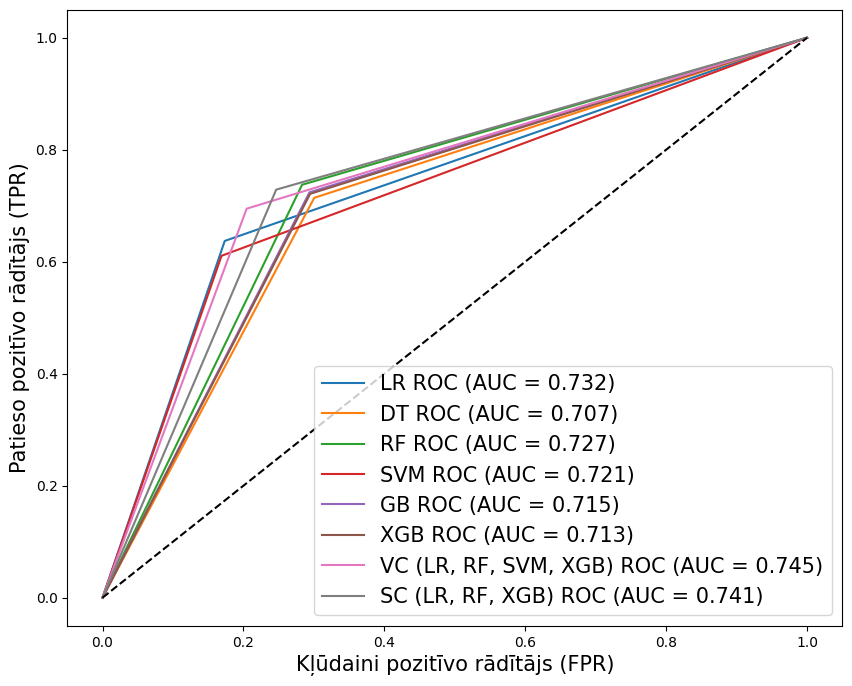

In [408]:
plt.figure(figsize=(10, 8))

plot_roc(y_true=test_class, y_pred=test_class_LR, name='LR')
plot_roc(y_true=test_class, y_pred=test_class_DT, name='DT')
plot_roc(y_true=test_class, y_pred=test_class_RF, name='RF')    
plot_roc(y_true=test_class, y_pred=test_class_SVM, name='SVM')
plot_roc(y_true=test_class, y_pred=test_class_GB, name='GB')
plot_roc(y_true=test_class, y_pred=test_class_XGB, name='XGB')
plot_roc(y_true=test_class, y_pred=test_class_Voting, name='VC (LR, RF, SVM, XGB)')
plot_roc(y_true=test_class, y_pred=test_class_Stacked, name='SC (LR, RF, XGB)')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Kļūdaini pozitīvo rādītājs (FPR)', fontsize=15)
plt.ylabel('Patieso pozitīvo rādītājs (TPR)', fontsize=15)
plt.legend(loc='lower right', fontsize = 15)
plt.show()